# 课程目标：在python环境下对临床资料进行整理

## 步骤
    1.读取：HIS和LIS数据
    2.整理：主要是数据类型的修改
    3.图形化：
    4.统计学：数据描述，统计方法的实现
    5.机器学习算法展示

## 准备工作：导入模块/软件库

    1.numpy主要用于科学计算，可生成homogeneous数据，本例中用其生成易于展示图形，统计分析的数据
    2.pandas用于导入数据，这些数据多为heterogeneous，是我们日常数据的主要形式
    3.matplotlib用于作图
    4.seaborn用于高级制图，尤其是统计学用到的
    5.statsmodels用于统计分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime, date, time, timedelta

## 设置显示参数
    a.统一使用inline
    b.调整显示r*w数，适时调整

In [2]:
# deploy the situation
## plt backends, e.g. through code "%matplotlib --list" --> inline/ipympl/widget
### matplotlib.use('nbAgg') --> need to call plt.show() for display

### conda install -y nodejs or install from nodejs.org
### pip install ipympl
### pip install --upgrade jupyterlab
### jupyter labextension install @jupyter-widgets/jupyterlab-manager
### jupyter labextension install jupyter-matplotlib
### jupyter nbextension enable --py widgetsnbextension
%matplotlib ipympl
## check with code 'plt.get_backend()'

# pandas display option
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)

# 1. 读取并查看数据
    1.HIS数据，神经内科2013年12月至2019年6月份出院患者病历首页部分数据
    2.LIS数据，神经内科部分腰穿脑脊液数据（常规，生化部分项目）
    NS:患者姓名，身份证等信息已被移除

In [19]:
# when missing=False, you got NaN
# HIS data
discharge = pd.read_excel('/Users/yqzhang/Desktop/Meeting/20190808_CGME_Python/Neuro_Discharged.xls', 
                    convert_missing=False) 

csf = pd.read_csv('/Users/yqzhang/Desktop/Meeting/20190808_CGME_Python/csf.csv') 

In [88]:
# 直接查看，head()，tail(), loc, iloc

In [20]:
# info(), 查看数据类型
discharge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57856 entries, 0 to 57855
Data columns (total 12 columns):
出院科室    57856 non-null object
住院号     57856 non-null object
年龄      57856 non-null int64
患者来源    57856 non-null object
诊断类型    57856 non-null object
诊断编码    57371 non-null object
诊断名称    57854 non-null object
入院日期    57856 non-null datetime64[ns]
出院日期    57856 non-null datetime64[ns]
住院天数    57856 non-null int64
非药费     57856 non-null float64
药费      57386 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 5.3+ MB


In [21]:
discharge.head()

,出院科室,住院号,年龄,患者来源,诊断类型,诊断编码,诊断名称,入院日期,出院日期,住院天数,非药费,药费
0,神经内科,ZY010000007045,87,门诊,主要诊断,H81.000,梅尼埃病,2014-05-19 10:03:56,2000-05-27 10:08:37,0,3025.56,3111.17
1,神经内科,ZY010000007045,87,门诊,其他诊断,I10.x00,高血压病,2014-05-19 10:03:56,2000-05-27 10:08:37,0,3025.56,3111.17
2,神经内科,ZY010000007045,87,门诊,其他诊断,I25.103,冠状动脉粥样硬化性心脏病,2014-05-19 10:03:56,2000-05-27 10:08:37,0,3025.56,3111.17
3,神经内科,ZY010000033205,77,门诊,主要诊断,I61.900,脑出血,2015-06-28 13:26:04,2000-07-04 08:00:35,0,4033.59,3135.88
4,神经内科,ZY010000033205,77,门诊,其他诊断,E78.500,高脂血症,2015-06-28 13:26:04,2000-07-04 08:00:35,0,4033.59,3135.88


# 2. 整理数据(will occupy your 80% workload)
以discharge数据为例，csf is available for analysis(wide table)
    2.1 删除不需要的observations(rows), variables(columns)
    2.2 修改variable name（字母简写）
    2.3 设定索引 variable ？

## 2.1 drop observations(rows) or variables(columns)
    a.英文化index; 修改，删除等操作
    b.使用loc，iloc进行slice，主要是loc
    c.tidying data: melt(), pivot_table()
    d.slice and merge new dataspreads for analysis

In [23]:
# 删除变量’出院科室‘
discharge.drop(columns='出院科室', inplace=True)

In [24]:
discharge.head()

,住院号,年龄,患者来源,诊断类型,诊断编码,诊断名称,入院日期,出院日期,住院天数,非药费,药费
0,ZY010000007045,87,门诊,主要诊断,H81.000,梅尼埃病,2014-05-19 10:03:56,2000-05-27 10:08:37,0,3025.56,3111.17
1,ZY010000007045,87,门诊,其他诊断,I10.x00,高血压病,2014-05-19 10:03:56,2000-05-27 10:08:37,0,3025.56,3111.17
2,ZY010000007045,87,门诊,其他诊断,I25.103,冠状动脉粥样硬化性心脏病,2014-05-19 10:03:56,2000-05-27 10:08:37,0,3025.56,3111.17
3,ZY010000033205,77,门诊,主要诊断,I61.900,脑出血,2015-06-28 13:26:04,2000-07-04 08:00:35,0,4033.59,3135.88
4,ZY010000033205,77,门诊,其他诊断,E78.500,高脂血症,2015-06-28 13:26:04,2000-07-04 08:00:35,0,4033.59,3135.88


In [28]:
## 修改变量名
discharge.columns=['IPD_ID', 'age', 'adm_site', 'diag_type', 'ICD',
             'diagnosis', 'adm_DT', 'dis_DT', 'stay_days', 'nondrug_fee', 'drug_fee']

In [27]:
discharge.head()

,IPD_ID,age,adm_site,diag_type,ICD,diagnosis,adm_DT,dis_DT,stay_days,nondrug_fee,drug_fee
0,ZY010000007045,87,门诊,主要诊断,H81.000,梅尼埃病,2014-05-19 10:03:56,2000-05-27 10:08:37,0,3025.56,3111.17
1,ZY010000007045,87,门诊,其他诊断,I10.x00,高血压病,2014-05-19 10:03:56,2000-05-27 10:08:37,0,3025.56,3111.17
2,ZY010000007045,87,门诊,其他诊断,I25.103,冠状动脉粥样硬化性心脏病,2014-05-19 10:03:56,2000-05-27 10:08:37,0,3025.56,3111.17
3,ZY010000033205,77,门诊,主要诊断,I61.900,脑出血,2015-06-28 13:26:04,2000-07-04 08:00:35,0,4033.59,3135.88
4,ZY010000033205,77,门诊,其他诊断,E78.500,高脂血症,2015-06-28 13:26:04,2000-07-04 08:00:35,0,4033.59,3135.88


In [ ]:
# 单个修改：df.rename(columns = {'sex':'Sex'})

In [ ]:
# 分成两个表格，一个服务于我们查看卫生经济学，一个服务于临床诊断

## datetime show
    1.pd.to_datetime from object type
    2.dt.hour/weekday_name etc to extract elements

In [27]:
data['Weekday']=data.Admit_DT.dt.weekday_name

In [40]:
data['Year']=data.Admit_DT.dt.year

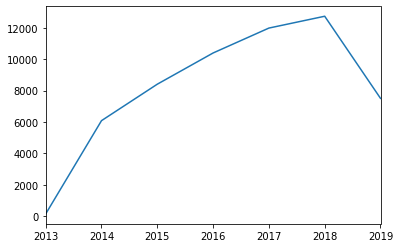

In [45]:
data['Year'].value_counts().sort_index().plot()

In [17]:
# pivot function for non-numeric var. pivot_table for numeric var
csf_data.pivot(index='样本编号',
                columns='项目名称',
                values='原始结果'                     
                    ).reset_index()

项目名称,样本编号,氯,脑脊液免疫球蛋白A,脑脊液免疫球蛋白G,脑脊液免疫球蛋白M,脑脊液白蛋白,脑脊液蛋白,葡萄糖
0,20140209G5030009,123.36,NaN,NaN,NaN,NaN,1.824,2.85
1,20140212G5030142,121.03,NaN,NaN,NaN,NaN,1.024,5.61
2,20140213G5030132,113.76,NaN,NaN,NaN,NaN,>2.297,0.97
3,20140213G5030133,119.82,NaN,NaN,NaN,NaN,1.636,2.10
4,20140217G5030137,122.77,NaN,NaN,NaN,NaN,1.019,3.06
5,20140218G5030194,123.36,NaN,NaN,NaN,NaN,0.424,4.05
6,20140219G5030176,119.92,NaN,NaN,NaN,NaN,0.195,3.55
7,20140220G5030150,123.57,NaN,NaN,NaN,NaN,0.610,3.26
8,20140220G5030158,122.67,NaN,NaN,NaN,NaN,0.373,3.20
9,20140220G5030162,117.11,NaN,NaN,NaN,NaN,2.404,2.00


In [15]:
data.groupby(['FromWhere', 'Attending'])['Drug_fee'].mean()

FromWhere  Attending
其他         张永庆           7210.488144
           徐军            6846.919677
           李玲            5766.361042
           杨海明           8196.159600
           梁兵           10832.265000
           赵冰            9076.041538
           赵翠萍           8322.988667
           钟庆            3055.601379
其他医疗机构转入   张永庆           7138.771429
           徐军            4911.570000
                            ...     
门诊         李海峰           3127.624194
           李玲            6013.691969
           杨海明           7279.270480
           梁兵            5865.178826
           王君涛           1557.850000
           苗萌            8845.740000
           赵冰            6115.085102
           赵翠萍           8418.845900
           钟庆            4872.318001
           高翔            5612.632727
Name: Drug_fee, Length: 47, dtype: float64

In [19]:
## change dtype with astype()
data['Age'] = data['Age'].astype(str)

In [ ]:
index = pd.MultiIndex.from_frame(csf_data.loc[:,['病人ID', '项目名称']])

In [ ]:
# concatenate: pd.concat()

In [ ]:
# merge: pd.merge()

# 2nd: Fundamental information

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.rename(columns = {'年龄':'age'})

In [ ]:
## sorting

In [ ]:
data.sort_values(by="年龄")

In [ ]:
data.columns

In [ ]:
unique_admission = data.groupby('住院号').first()

In [ ]:
unique_admission.describe()

In [ ]:
attending = data.groupby('主治医师').mean()

In [ ]:
attending[['住院天数','非药费', '药费']]

In [ ]:
## correlation and covariance

In [ ]:
data.corr()

In [ ]:
data['非药费'].cov(data['药费'])

In [ ]:
## membership: isin

# 3. 数据描述 + plotting

常见数据描述，如mean，std，variance，covariance，rr，ro --> 使用数学符号做show

    a.定义一个figure: plt.figure()
    b.定义数个axes: fig.add_subplot(2,2,1) or 合并a+b，fig axes=plt.subplots(nrows=2, ncols=2)
    c.在axes上使用plt.sns等绘图
    c.定义axes的特征
        ax.set(xlim, ylim,title, xlabel, etc
        ax.set_xlim
以single variable，two varialbes来展示

### 3.1 mean
    离散变量平均数的数学公式: $$\mu=\frac{\sum\limits_{i=1}^{n}x_i}{N}$$

$$\mu=\frac{\sum\limits_{i=1}^{n}x_i}{N}$$

### 3.2 variance
    方差的数学公式(population) $$ \sigma^2=\frac{1}{N}\sum\limits_{i=1}^{n} (x_i-\mu)^2  $$

$$ \sigma^2=\frac{1}{N}\sum\limits_{i=1}^{n} (x_i-\mu)^2  $$

    方差的数学公式(sample)

$$ S^2=\frac{1}{n-1}\sum\limits_{i=1}^{n} (x_i-\bar{x})^2  $$

### 3.3 standard deviation
    标准差的数学公式： $$ \sigma = \sqrt{variance} \mspace{6mu} or \mspace{6mu} \sqrt{\sigma^2} $$

$$ \sigma = \sqrt{variance} \mspace{6mu} or \mspace{6mu} \sqrt{\sigma^2} $$ 

In [3]:
#可以绘制多个图叠加，任意控制元素
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1,2,3,4], [10, 20, 25, 30], linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1,2,3,5], marker='o')
ax.set_xlabel('number of what', size=20)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'number of what')

## single variable

    1.histogram（直方图）: discrete数据
    2.kde（核概率密度估计）: continuous数据

In [11]:
%whos

Variable     Type           Data/Info
-------------------------------------
a            ndarray        10000: 10000 elems, type `float64`, 80000 bytes
ax           AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
axes         ndarray        2x2: 4 elems, type `object`, 32 bytes
date         type           <class 'datetime.date'>
datetime     type           <class 'datetime.datetime'>
fig          Figure         Figure(432x288)
fig2         Figure         Figure(432x288)
matplotlib   module         <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np           module         <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd           module         <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt          module         <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sm           module         <module 'statsmodels.api'<...>ages/statsmodels/api.py'>
smf          module         <module 'statsmodels.form<...>tsmodels/formula/api.py'>
sns          modu

## plot two or several variables/columns

    1.scatter(散点图): two continous数据
    2.box or bar: one continous by one dummy 数据

In [ ]:
sns.scatterplot('Nondrug_fee', 'Drug_fee', data=data)

# 4. 统计分析 + 作图

    1.t-test
    2.ANOVA
    3.regression: OLS 
    4.nonparametric testing（非参数检验）
    5.Kaplan Meier plot using lifelines module

### 4.1 t-test by scipy.stat

#### T-test(两样本) t值的计算

$$ t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{S_1^2}{N_1}+\frac{S_2^2}{N_2}}}$$

#### 按照自由度df=N1+N2-1，计算/查表获取 p value

In [58]:
from scipy import stats

In [60]:
## nan_policy 
stats.ttest_ind(data['Nondrug_fee'], data['Drug_fee'], nan_policy='omit')

Ttest_indResult(statistic=32.7768893661516, pvalue=1.559122946304171e-234)

In [ ]:
## computing dummy variables

In [ ]:
pd.get_dummies(data['住院医师'], prefix='住院医师')

In [ ]:
df = pd.DataFrame([['bar', 'one'], ['bar', 'two'],
                 ['foo','one'], ['foo', 'two']],
                 columns=['first', 'second'])

In [ ]:
index = pd.MultiIndex.from_frame(df)

In [ ]:
pd.DataFrame(np.random.randn(4,10), index=index)

In [ ]:
sns.scatterplot?